Провести сегментацию нескольких выбранных цветных изображений несколькими алгоритмами и провести сравнение результатов. В результате сегментации должно получиться изображение того же размера, что и исходное, на котором все пиксели, принадлежащие одному сегменту, окрашены в один и тот же цвет. Цвета могут быть выбраны случайно или заданы фиксированным образом через создание массива используемых цветов.
Сегментацию изображений следует провести следующими алгоритмами:

1. Обеспечить бинаризацию изображения (методом Оцу или методом балансировки гистограммы полутонового варианта изображения), удалить шумы типа «соль и перец» и выделить сегменты путем «выращивания семян».

2. Использовать комбинацию гистограммного метода и алгоритма «выращивания семян» для сегментации полутонового изображения. Количество выделенных сегментов должно быть не менее количества сегментов, выделенных путем анализа бинарного изображения.

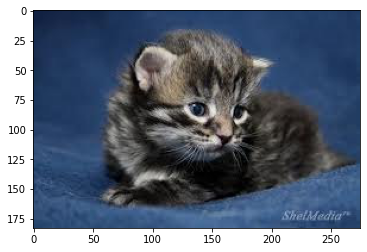

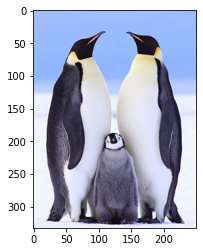

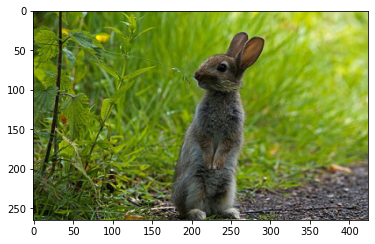

In [103]:
import numpy as np
from pylab import *
from PIL import Image
import numpy as np
im=array(Image.open('11.jpg'))
im1=array(Image.open('22.jpg'))
im2=array(Image.open('33.jpg'))
imshow(im)
show()
imshow(im1)
show()
imshow(im2)
show()

img=np.array(im)
img1=np.array(im1)
img2=np.array(im2)

In [104]:
def ToGray(img):
  data = img.copy()
  for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        #sum = numpyimg[i,j,0] * 0.299 + numpyimg[i,j,1] * 0.587 + numpyimg[i,j,2] * 0.114
        #temp[i][j] = sum
        
        #sum = numpyimg[i,j,0] + numpyimg[i,j,1] + numpyimg[i,j,2]
        #sum/=3
        #data2[i,j] = [sum, sum, sum]

        sum = (int(data[i, j, 0]) + int(data[i, j, 1]) + int(data[i, j, 2]))/3
        data[i, j] = [sum, sum, sum]
  return data

def Histogram(img):
  t = []
  for e in img:
    for e2 in e:
      for e3 in e2:
        t.append(int(e3))
  d = {}
  for e in t:
    if e not in d.keys():
      d[e] = 1
    else:
      d[e] += 1
  return d

<BarContainer object of 237 artists>

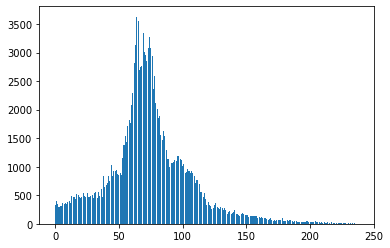

In [105]:
d1=Histogram(ToGray(img))
plt.bar(d1.keys(), d1.values())

<BarContainer object of 256 artists>

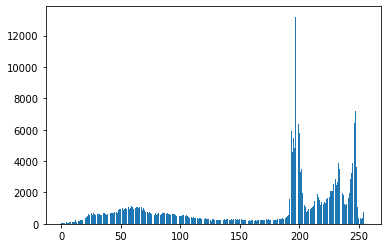

In [106]:
d2=Histogram(ToGray(img1))
plt.bar(d2.keys(), d2.values())

<BarContainer object of 238 artists>

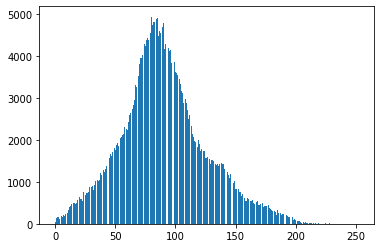

In [107]:
d3=Histogram(ToGray(img2))
plt.bar(d3.keys(), d3.values())

In [108]:
def Norm(img,arr):
  w,h=img.shape[0],img.shape[1]
  d=arr[len(arr)-1]
  res=img.copy()
  for x in range(w):
    for y in range(h):
      for c in range(3):
        color=int(arr[img[x,y,0]]/d*255)
        res[x,y,c]=color
  return res


def ToArray(img):
  arr=np.zeros((256))
  for j in range(img.shape[0]):
    for i in range(img.shape[1]):
      arr[img[j,i,0]]+=1
  return arr

In [109]:
arr1 = ToArray(ToGray(img))
arr2 = ToArray(img1)
arr3 = ToArray(img2)

In [110]:
def Otsy(arr):
  T=1
  count=np.sum(arr)
  el_l=arr[0]
  m_sig=-1
  for i in range(1,254):
    el_l+=arr[i]
    q1=el_l/count
    q2=1-q1
    l=np.var(arr[0:i])
    r=np.var(arr[i:255])
    u=q1*l+q2*r
    if u>m_sig:
      T=i
      m_sig=u
  return T

def BinImg(img,t):
  
  w,h=img.shape[0],img.shape[1]
  res=np.zeros((w,h),dtype=np.bool_)
  for x in range(w):
    for y in range(h):
      if img[x,y,0]<t:
        res[x,y]=1
  return res

def SaltPepper(img):
  res=img.copy()
  w,h=img.shape[0],img.shape[1]

  for x in range(1,w-1):
    for y in range(1,h-1):
      if np.sum(img[x-1:x+1,y-1:y+1])==1 and img[x,y]==1:
        res[x,y]=0
      if np.sum(img[x-1:x+1,y-1:y+1])==8 and img[x,y]==0:
        res[x,y]=1
  return res

In [111]:
t=Otsy(arr1)
bimg=BinImg(ToGray(img),t)

t1=Otsy(arr2)
bimg1=BinImg(ToGray(img1),t1)

t2=Otsy(arr3)
bimg2=BinImg(ToGray(img2),t2)

bimg=SaltPepper(bimg)
bimg1=SaltPepper(bimg1)
bimg2=SaltPepper(bimg2)

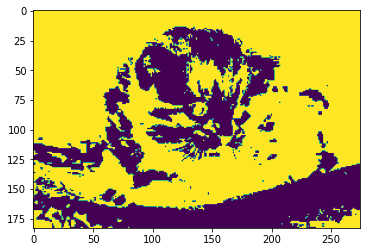

In [112]:
imshow(bimg)
show()

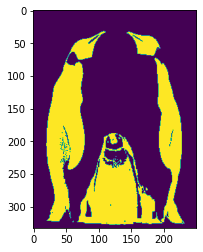

In [113]:
imshow(bimg1)
show()

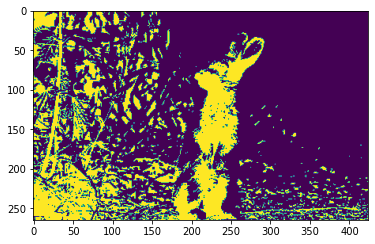

In [114]:
imshow(bimg2)
show()

In [115]:
import random

def NewColor():
  r = lambda: random.randint(1,255)
  return [r(),r(),r()]

def BinSeeds(img):
  w,h=img.shape[0],img.shape[1]
  res=np.zeros((w,h,3),dtype=np.uint8)
  for x in range(w):
    for y in range(h):
      if res[x,y,0]==0:
        c=NewColor()
        segm=BinSeg2(img,x,y)
        for el in segm:
          res[el[0],el[1]]=c
      else:
        continue
  return res

def BinSeg2(img,x,y):
  buff=[[x,y]]
  res=[]
  ch=[]
  mu=img[x,y]
  while len(buff)!=0:
    i=0
    for el in buff:
      ch.append(el)
      buff.remove(el)
      if img[el[0],el[1]]==mu:
        res.append(el)
        if el[0]+1<img.shape[0] and ([el[0]+1,el[1]] not in ch) and ([el[0]+1,el[1]] not in buff):
          buff.append([el[0]+1,el[1]])
        if el[1]+1<img.shape[1] and ([el[0],el[1]+1] not in ch) and ([el[0],el[1]+1] not in buff):
          buff.append([el[0],el[1]+1])
        if el[0]>0 and ([el[0]-1,el[1]] not in ch) and ([el[0]-1,el[1]] not in buff):
          buff.append([el[0]-1,el[1]])
        if el[1]>0 and ([el[0],el[1]-1] not in ch) and ([el[0],el[1]-1] not in buff):
          buff.append([el[0],el[1]-1])
  return res


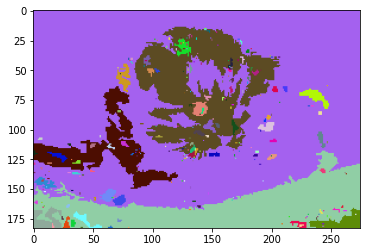

In [116]:
seg=BinSeeds(bimg)

imshow(seg)
show()

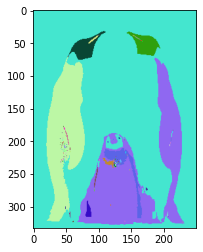

In [118]:
seg1=BinSeeds(bimg1)
imshow(seg1)
show()

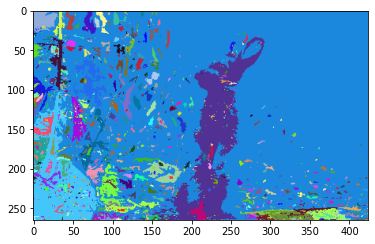

In [119]:
seg2=BinSeeds(bimg2)
imshow(seg2)
show()

In [121]:
def GistM(img,arr,shift=0):
  mins=[]
  img=img.copy()
  for i in range(2,len(arr)-2):
    if arr[i-1]-arr[i]>shift and arr[i-2]-arr[i-1]>0 and arr[i+1]-arr[i]>shift and arr[i+2]-arr[i+1]>0:
      mins.append(i)
  halftone=np.average(img, axis=2)
  
  colors = np.zeros((len(mins) + 1, 3))
  colors[0] = NewColor()
  img[mins[0] > halftone] = colors[0]
  maxi = len(mins)
  colors[maxi] = NewColor()
  img[mins[maxi-1] < halftone] = colors[maxi]
  for i in range(1, len(mins)):
    colors[i] = NewColor()
    indexes=np.logical_and(mins[i] > halftone, halftone > mins[i - 1])
    img[indexes] = colors[i]
  return img

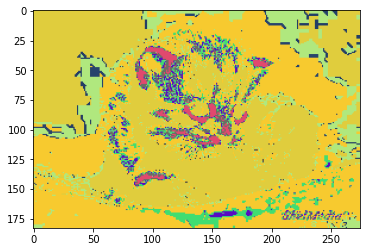

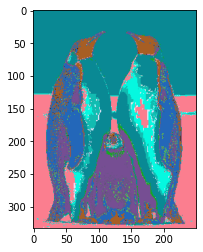

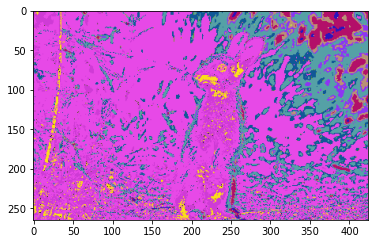

In [123]:
nimg=GistM(img,arr1,4)
imshow(nimg)
nimg1=GistM(img1,arr2,4)
imshow(nimg)
nimg2=GistM(img2,arr3,4)
imshow(nimg)
show()
imshow(nimg1)
show()
imshow(nimg2)
show()